In [5]:
import pandas as pd

# Step 1: Load the CSV files into pandas DataFrames
emotion_df = pd.read_csv("C:/Users/lenovo/Downloads/emotion_data-20240917T043735Z-001/emotion_data/7/emotion.csv")
gaze_df = pd.read_csv("C:/Users/lenovo/Downloads/emotion_data-20240917T043735Z-001/emotion_data/7/gaze.csv")
metadata_df = pd.read_csv("C:/Users/lenovo/Downloads/emotion_data-20240917T043735Z-001/emotion_data/7/metadata.csv")

# Step 2: Merge the emotion, gaze, and metadata DataFrames based on 'movie_id' and 'image_seq'
merged_df = pd.merge(metadata_df, emotion_df, on=['movie_id', 'image_seq'], how='left')
merged_df = pd.merge(merged_df, gaze_df, on=['movie_id', 'image_seq'], how='left')

# Step 3: Drop the 'distance' column if it exists (Optional, based on your data)
if 'distance' in merged_df.columns:
    merged_df = merged_df.drop(columns=['distance'])

# Step 4: Save the merged DataFrame to a CSV file
output_file = 'merged_metadata_emotion_gaze.csv'
merged_df.to_csv(output_file, index=False)

print(f"Merged data saved to {output_file}")


Merged data saved to merged_metadata_emotion_gaze.csv


Total Gaze: 43
Total No Gaze: 8
Total Blink: 8
Total No Blink: 43


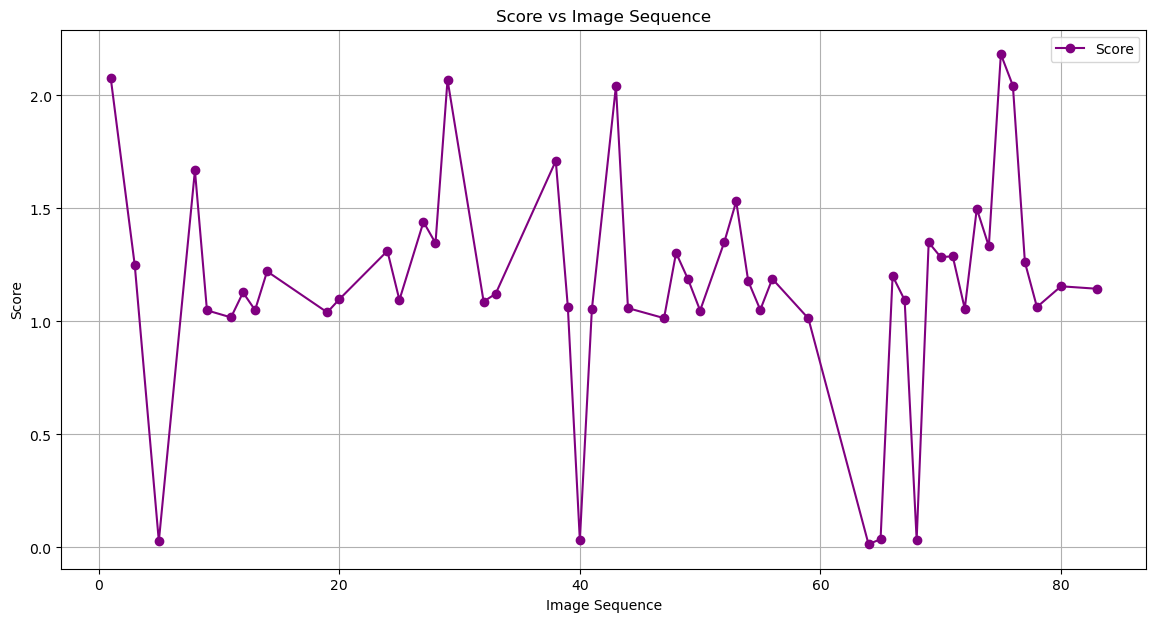

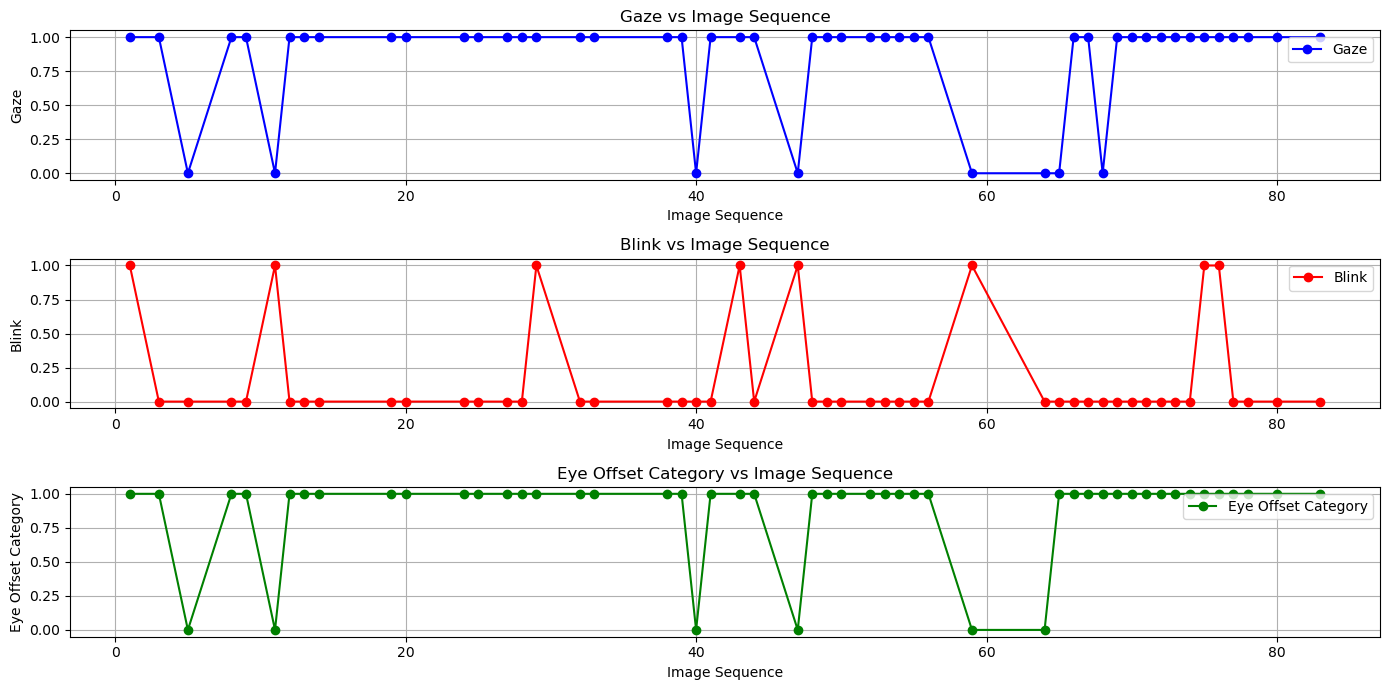

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("C:/Users/lenovo/merged_metadata_emotion_gaze.csv")

# Gaze Analysis
total_gaze = df[df['gaze'] == 1].shape[0]
total_no_gaze = df[df['gaze'] == 0].shape[0]
print(f"Total Gaze: {total_gaze}")
print(f"Total No Gaze: {total_no_gaze}")

# Blink Analysis
total_blink = df[df['blink'] == 1].shape[0]
total_no_blink = df[df['blink'] == 0].shape[0]
print(f"Total Blink: {total_blink}")
print(f"Total No Blink: {total_no_blink}")

# Categorize eye_offset
df['eye_offset_category'] = df['eye_offset'].apply(lambda x: 1 if -30 <= x <= 30 else 0)

# Calculate the new score using the given formula
df['score'] = (1 / (1 + df['eye_offset'].abs())) + df['blink'] + df['gaze']

# Save the updated DataFrame to a new CSV file
df.to_csv("C:/Users/lenovo/Desktop/new.csv", index=False)

# Plotting
plt.figure(figsize=(14, 7))

# Plot the new score
plt.plot(df['image_seq'], df['score'], label='Score', color='purple', marker='o')
plt.xlabel('Image Sequence')
plt.ylabel('Score')
plt.title('Score vs Image Sequence')
plt.legend()
plt.grid(True)
plt.show()

# Plot Gaze
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.plot(df['image_seq'], df['gaze'], label='Gaze', color='blue', marker='o')
plt.xlabel('Image Sequence')
plt.ylabel('Gaze')
plt.title('Gaze vs Image Sequence')
plt.legend()
plt.grid(True)

# Plot Blink
plt.subplot(3, 1, 2)
plt.plot(df['image_seq'], df['blink'], label='Blink', color='red', marker='o')
plt.xlabel('Image Sequence')
plt.ylabel('Blink')
plt.title('Blink vs Image Sequence')
plt.legend()
plt.grid(True)

# Plot Eye Offset Category
plt.subplot(3, 1, 3)
plt.plot(df['image_seq'], df['eye_offset_category'], label='Eye Offset Category', color='green', marker='o')
plt.xlabel('Image Sequence')
plt.ylabel('Eye Offset Category')
plt.title('Eye Offset Category vs Image Sequence')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
